In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
from google.colab import files 
  
  
uploaded = files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1 (3).csv


In [ ]:

df = pd.read_csv(io.BytesIO(uploaded['supermarket_sales - Sheet1.csv']))

In [ ]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [27]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [28]:
mean = np.mean(df) 
std = np.std(df) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
dtype: float64
std. deviation is Unit price                 2.648138e+01
Quantity                   2.921969e+00
Tax 5%                     1.170297e+01
Total                      2.457624e+02
cogs                       2.340594e+02
gross margin percentage    6.217249e-14
gross income               1.170297e+01
Rating                     1.717721e+00
dtype: float64


In [32]:
corelation=df.corr()

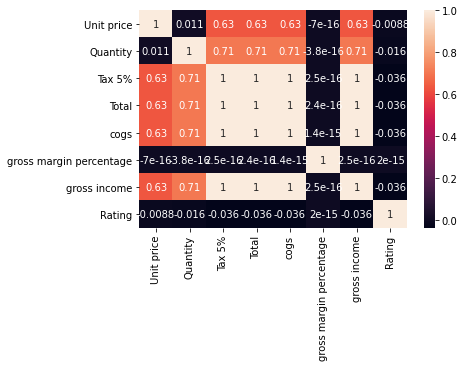

In [33]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

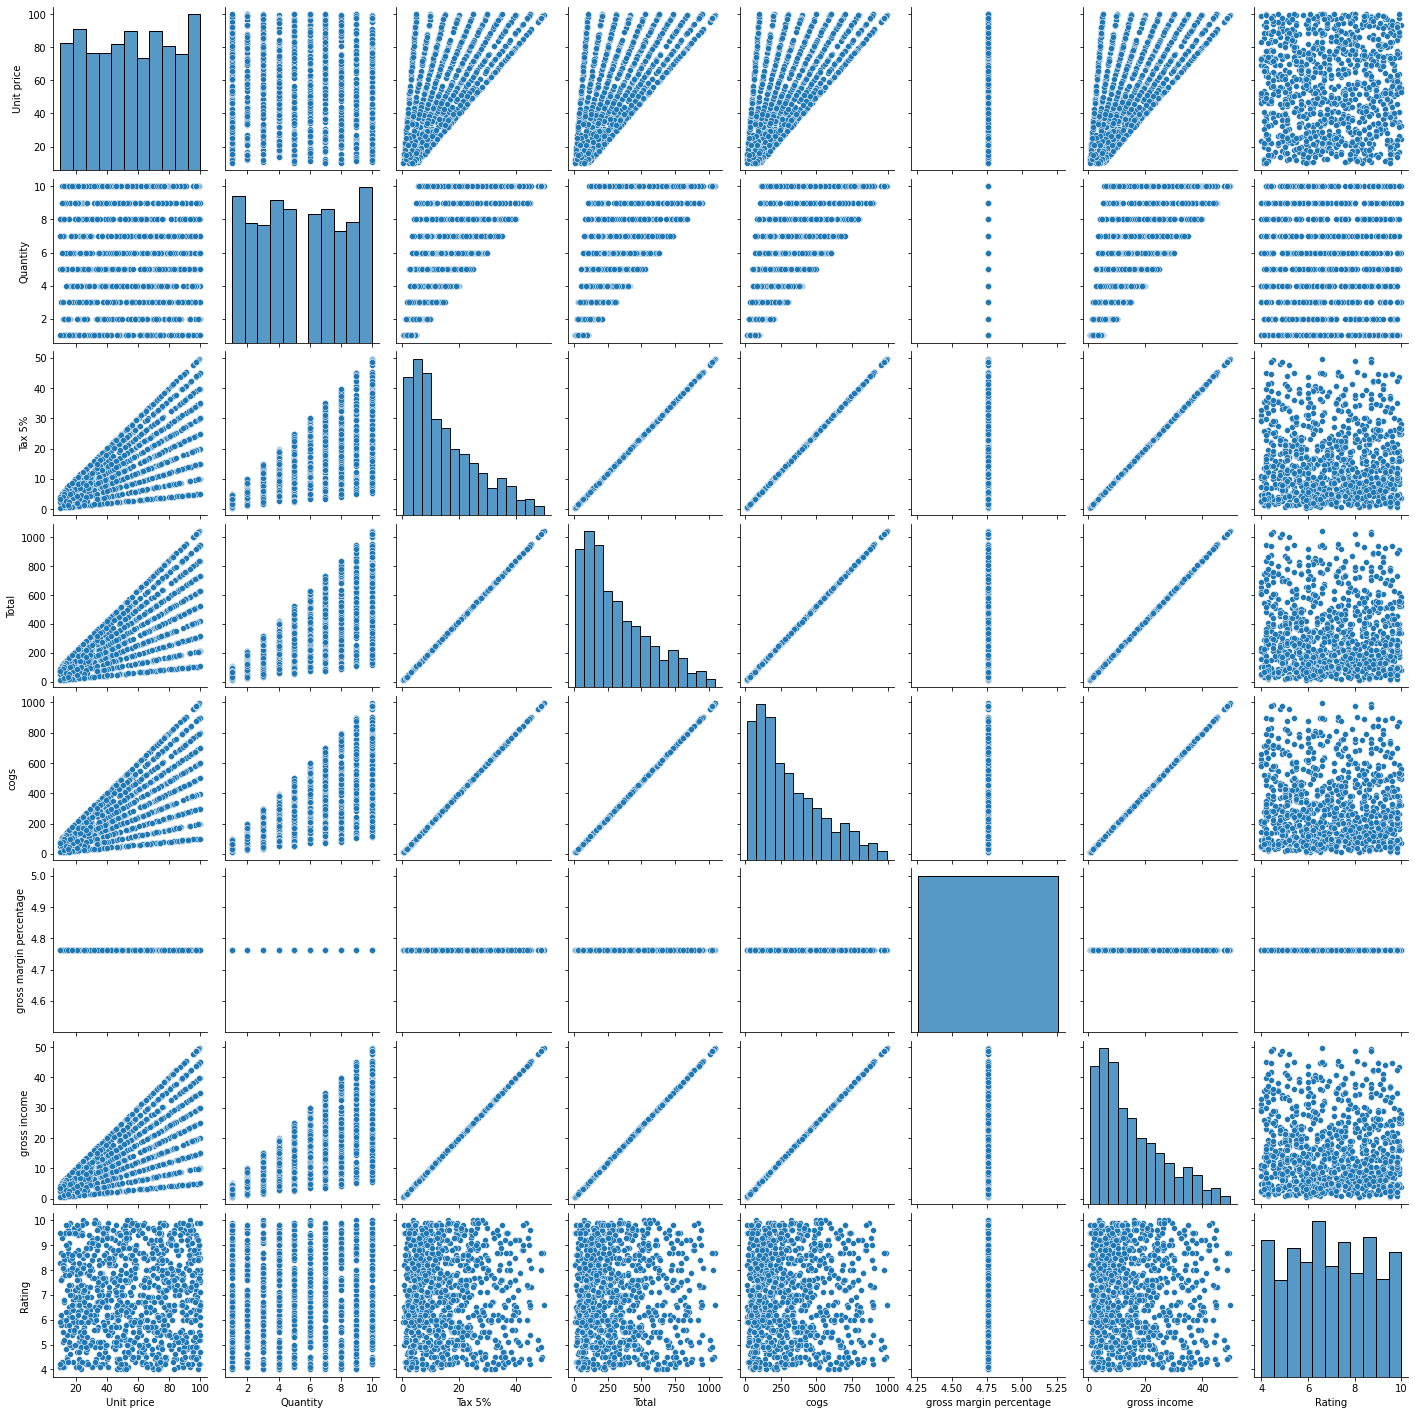

In [34]:
sns.pairplot(df)

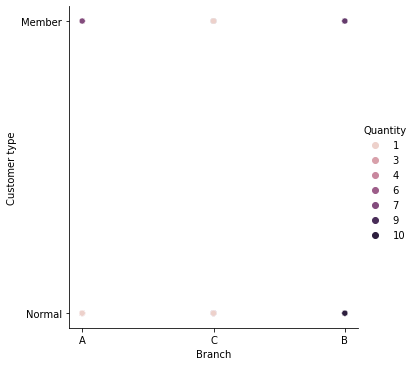

In [38]:
sns.relplot(x='Branch', y='Customer type', hue='Quantity', data=df)

In [39]:
import matplotlib.pyplot as plt

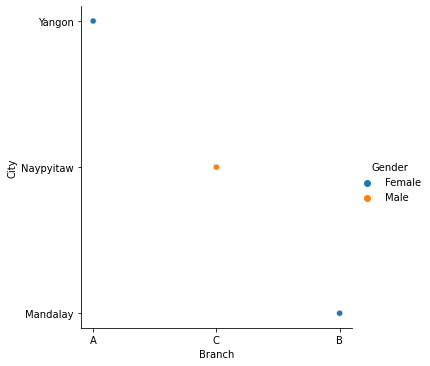

In [40]:
sns.relplot(x='Branch', y='City', hue='Gender', data=df)

In [41]:
sales = df.set_index('Invoice ID')

In [42]:
sales['date'] = pd.to_datetime(sales['Date'])

In [43]:
sales['date']

Invoice ID
750-67-8428   2019-01-05
226-31-3081   2019-03-08
631-41-3108   2019-03-03
123-19-1176   2019-01-27
373-73-7910   2019-02-08
                 ...    
233-67-5758   2019-01-29
303-96-2227   2019-03-02
727-02-1313   2019-02-09
347-56-2442   2019-02-22
849-09-3807   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [44]:
type(sales['date'])

pandas.core.series.Series

In [46]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [47]:
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour 

In [48]:
sales['Hour'].nunique() 

11

In [49]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [50]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [51]:
categorical_columns

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [52]:
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


In [53]:
sales = sales.drop('Tax 5%', axis =1)
sales = sales.drop('day', axis =1)
sales = sales.drop('gross margin percentage', axis =1)

In [54]:
sales.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,date,month,year,Hour
Invoice ID,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,2020-10-03 13:08:00,Ewallet,522.83,26.1415,9.1,2019-01-05,1,2019,13
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,2020-10-03 10:29:00,Cash,76.40,3.8200,9.6,2019-03-08,3,2019,10
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,2020-10-03 13:23:00,Credit card,324.31,16.2155,7.4,2019-03-03,3,2019,13
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,2020-10-03 20:33:00,Ewallet,465.76,23.2880,8.4,2019-01-27,1,2019,20
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,2020-10-03 10:37:00,Ewallet,604.17,30.2085,5.3,2019-02-08,2,2019,10


In [55]:
sales.describe()

,Unit price,Quantity,Total,cogs,gross income,Rating,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270,1.993000,2019.0,14.910000
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858,0.835254,0.0,3.186857
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000,3.000000,2019.0,18.000000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000,3.000000,2019.0,20.000000


In [56]:
sales['City'].value_counts(ascending = True)

Naypyitaw    328
Mandalay     332
Yangon       340
Name: City, dtype: int64

In [57]:
sales['Product line'].value_counts(ascending = True)

Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product line, dtype: int64

In [58]:
df_revenue_by_city = sales.groupby('City').agg([np.sum, np.median, np.mean])
df_revenue_by_city[['gross income']].T

City                    Mandalay    Naypyitaw       Yangon
gross income sum     5057.032000  5265.176500  5057.160500
             median    12.042000    12.924750    11.468000
             mean      15.232024    16.052367    14.874001

Naypyitaw is the city which possed the high gross income

In [59]:
df_revenue_by_city[['gross income', 'Unit price', 'Quantity']]

gross income                       ... Quantity                 
                   sum    median       mean  ...      sum median      mean
City                                         ...                          
Mandalay     5057.0320  12.04200  15.232024  ...     1820      5  5.481928
Naypyitaw    5265.1765  12.92475  16.052367  ...     1831      6  5.582317
Yangon       5057.1605  11.46800  14.874001  ...     1859      5  5.467647

[3 rows x 9 columns]

In [60]:
df_revenue_by_gender = sales.groupby('Gender').agg([np.median,np.mean, sum])
df_revenue_by_gender.T

Gender                     Female          Male
Unit price   median  5.407000e+01  5.650000e+01
             mean    5.526395e+01  5.608194e+01
             sum     2.768724e+04  2.798489e+04
Quantity     median  6.000000e+00  5.000000e+00
             mean    5.726547e+00  5.292585e+00
             sum     2.869000e+03  2.641000e+03
Total        median  2.725800e+02  2.442300e+02
             mean    3.350957e+02  3.107892e+02
             sum     1.678829e+05  1.550838e+05
cogs         median  2.596000e+02  2.326000e+02
             mean    3.191387e+02  2.959897e+02
             sum     1.598885e+05  1.476989e+05
gross income median  1.298000e+01  1.163000e+01
             mean    1.595694e+01  1.479949e+01
             sum     7.994425e+03  7.384944e+03
Rating       median  7.100000e+00  6.900000e+00
             mean    6.964471e+00  6.980962e+00
             sum     3.489200e+03  3.483500e+03
month        median  2.000000e+00  2.000000e+00
             mean    1.970060e+00  2.016032e+00
             sum     9.870000e+02  1.006000e+03
year         median  2.019000e+03  2.019000e+03
             mean    2.019000e+03  2.019000e+03
             sum     1.011519e+06  1.007481e+06
Hour         median  1.400000e+01  1.500000e+01
             mean    1.464271e+01  1.517836e+01
             sum     7.336000e+03  7.574000e+03

In [61]:
df_revenue_by_membre = sales.groupby('Customer type').agg([np.median, sum])
df_revenue_by_membre.T

Customer type             Member       Normal
Unit price   median       56.040       54.280
             sum       28159.700    27512.430
Quantity     median        5.000        5.000
             sum        2785.000     2725.000
Total        median      266.028      237.426
             sum      164223.444   158743.305
cogs         median      253.360      226.120
             sum      156403.280   151184.100
gross income median       12.668       11.306
             sum        7820.164     7559.205
Rating       median        7.000        7.000
             sum        3477.100     3495.600
month        median        2.000        2.000
             sum         996.000      997.000
year         median     2019.000     2019.000
             sum     1011519.000  1007481.000
Hour         median       15.000       15.000
             sum        7500.000     7410.000

In [62]:
sales.corr()

,Unit price,Quantity,Total,cogs,gross income,Rating,month,year,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778,-0.027387,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815,-0.014524,NaN,-0.007317
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,-0.022301,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,-0.022301,NaN,-0.002770
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,-0.022301,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000,-0.042880,NaN,-0.030588
month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,-0.042880,1.000000,NaN,0.043762
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,-0.030588,0.043762,NaN,1.000000


In [63]:
np.round(sales.corr(),2) #Round a number to only two decimals

,Unit price,Quantity,Total,cogs,gross income,Rating,month,year,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,-0.01,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.02,-0.01,NaN,-0.01
Total,0.63,0.71,1.00,1.00,1.00,-0.04,-0.02,NaN,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,-0.04,-0.02,NaN,-0.00
gross income,0.63,0.71,1.00,1.00,1.00,-0.04,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,1.00,-0.04,NaN,-0.03
month,-0.03,-0.01,-0.02,-0.02,-0.02,-0.04,1.00,NaN,0.04
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,0.01,-0.01,-0.00,-0.00,-0.00,-0.03,0.04,NaN,1.00


***Data Visualization***

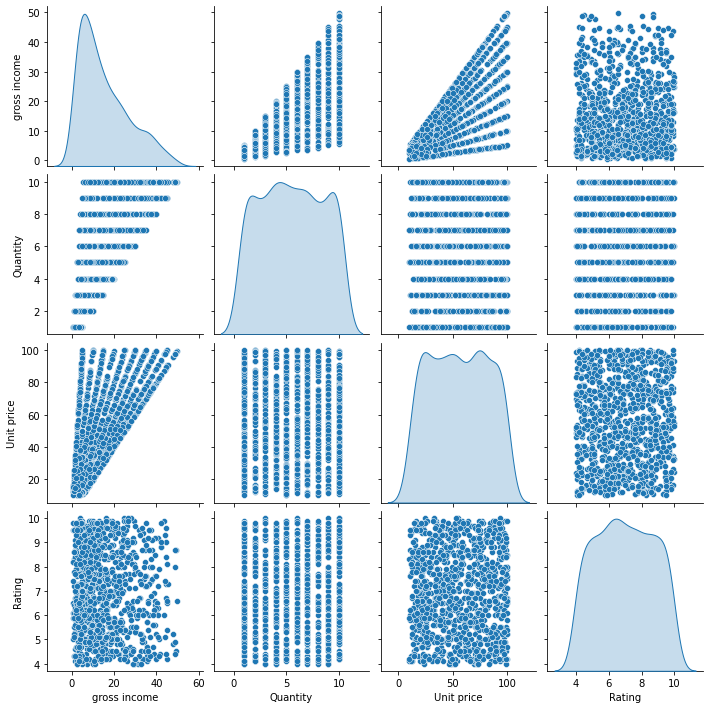

In [64]:
sns.pairplot(sales[["gross income", "Quantity", "Unit price", "Rating"]], diag_kind="kde")

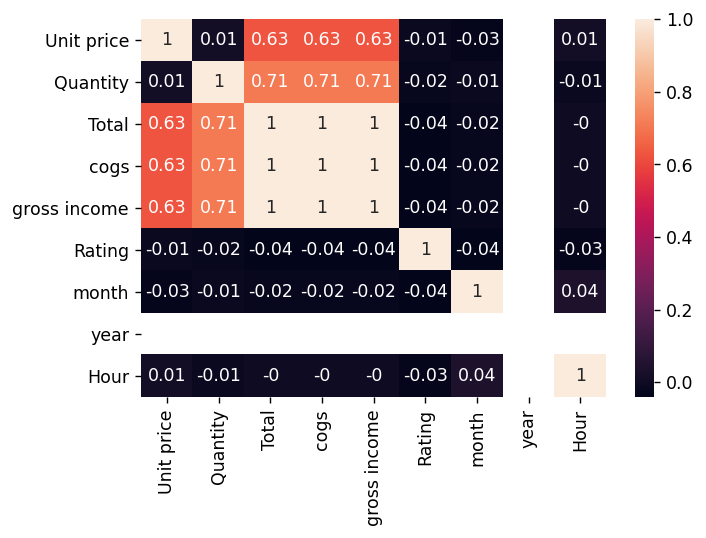

In [65]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

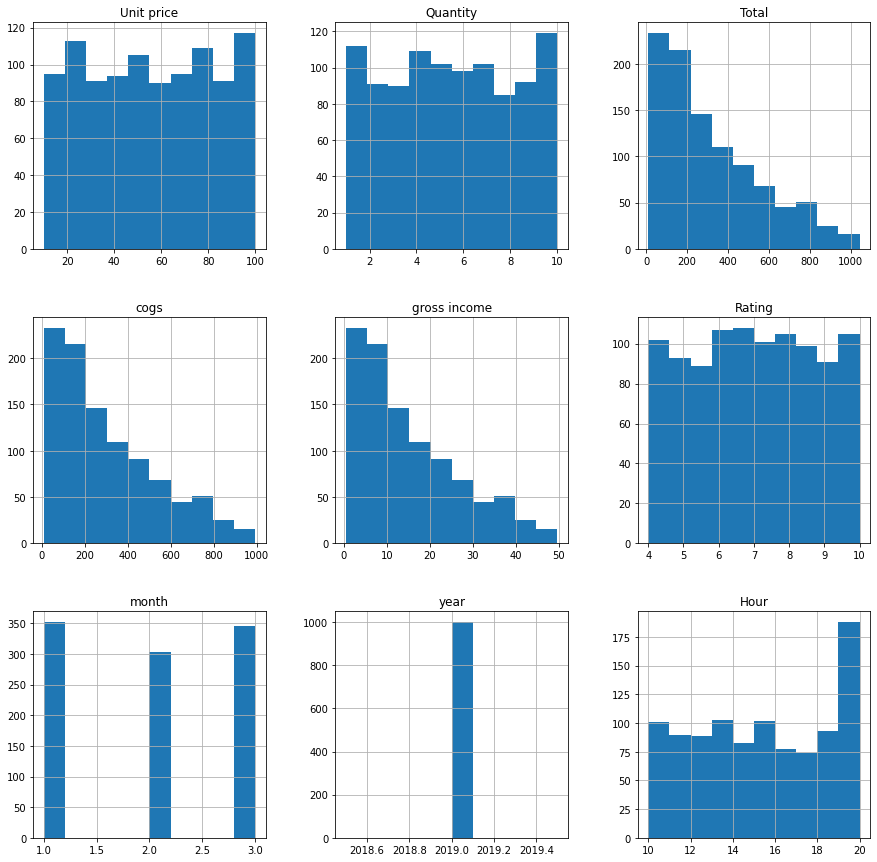

In [66]:
# Plotting Histogram for all
sales.hist(figsize=(15,15))
plt.show()

Text(0.5, 1.0, 'Branch Count')

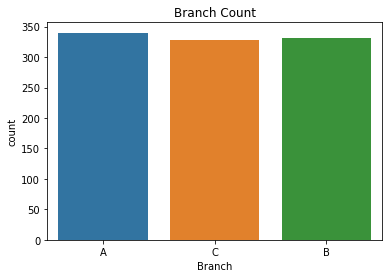

In [67]:
sns.countplot(x="Branch", data =sales).set_title("Branch Count") 


A is the most busy branch

Text(0.5, 1.0, 'Payment Channel')

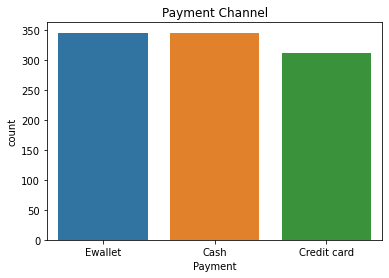

In [68]:
# Time to find most used Payment Method

sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Most of the customers pay through the Ewallet and Cash Payment.

Text(0.5, 1.0, 'Payment per Product line ')

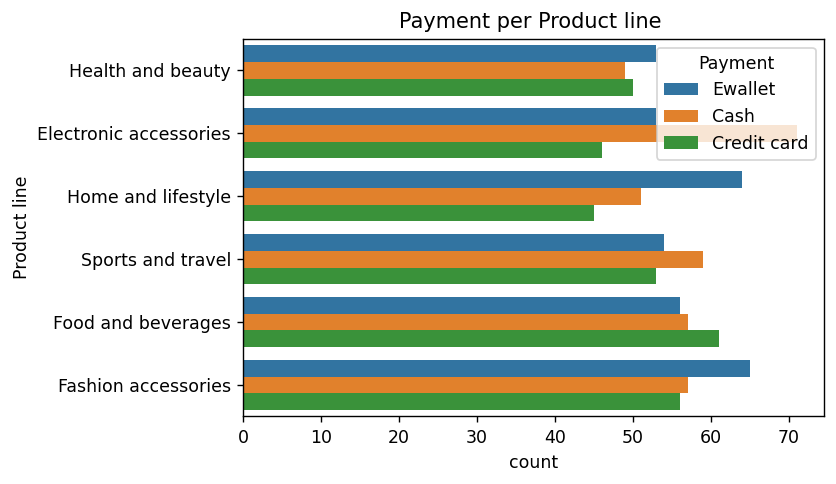

In [69]:
plt.figure(dpi=125)
sns.countplot(y = "Product line",  hue = "Payment", data =sales).set_title('Payment per Product line ')

Text(0.5, 1.0, 'Payment Channel by Branch')

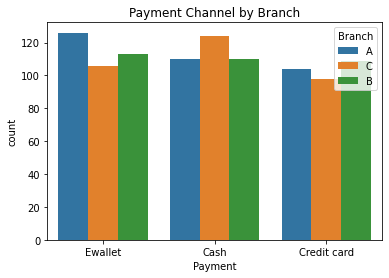

In [70]:
# Payment Channel by Branch
sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

Text(0.5, 1.0, 'Gender_Count')

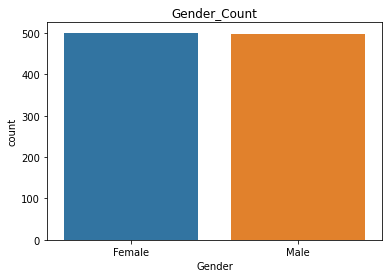

In [71]:
sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

**Ratings by Branch**

Text(0.5, 1.0, 'Ratings by Branch')

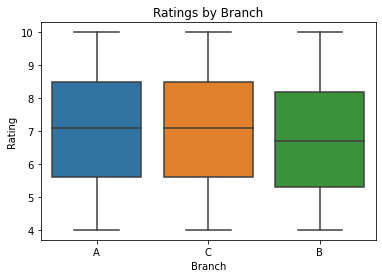

In [72]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

**Distribution of branch's sales quantity per hour in a monthly fashion in function Gender type (Female/male)**

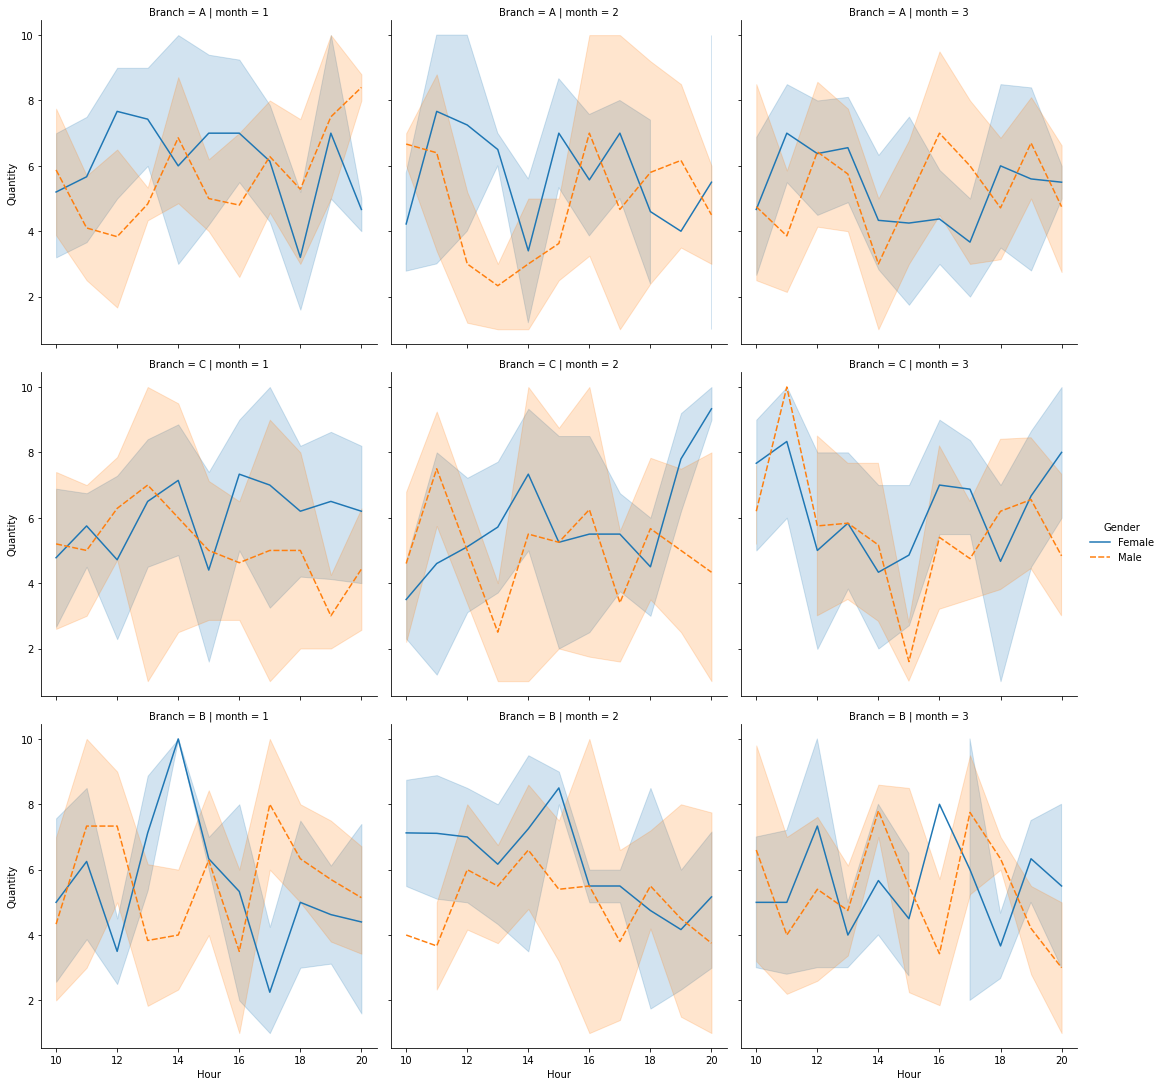

In [73]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

**Distribution of branch's sales quantity per hour in a monthly fashion in function Customer type (membre/normal)**

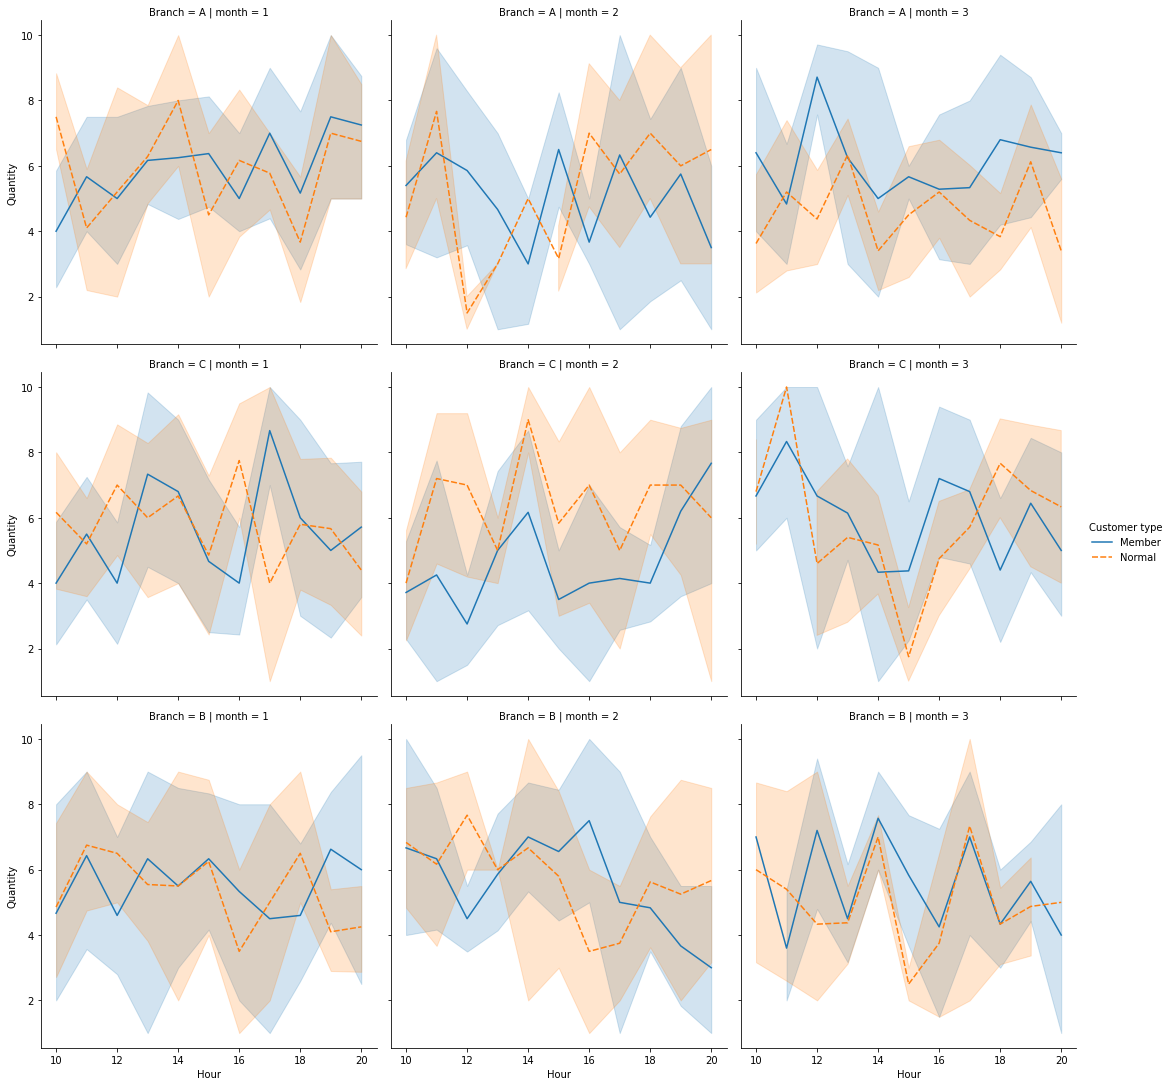

In [74]:
CustomerCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Customer type", style="Customer type", data =sales)

**Distribution of each branch's sales quantity by the hour in a monthly fashion**

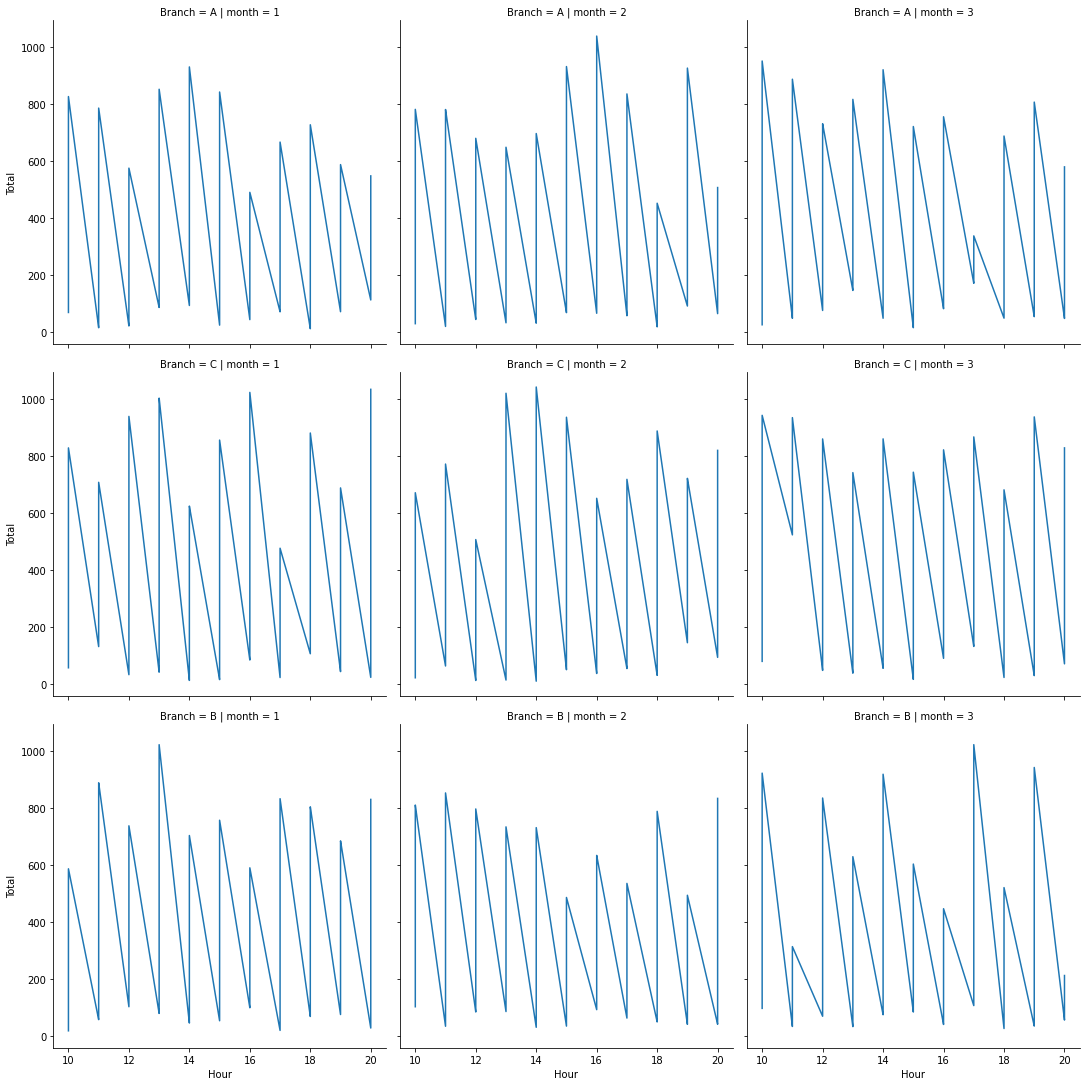

In [75]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

**Product Analysis**

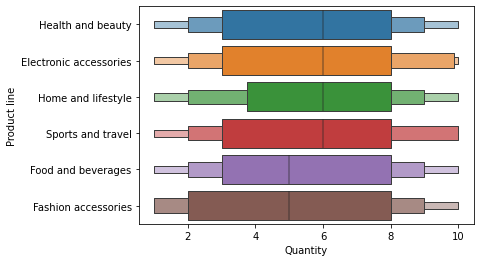

In [77]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

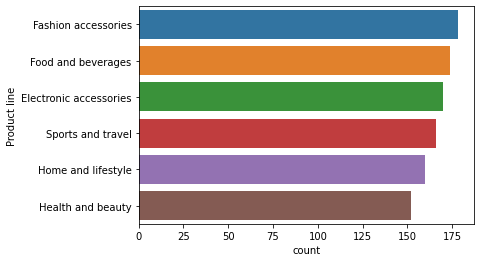

In [78]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index)

From the above image shows the top product line item type sold in the given dataset:

Fashion Accessories is the highest.
Health andbeauty is the lowest.



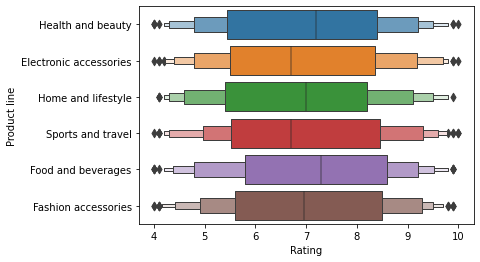

In [79]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Food and Beverages have the highest average rating while sports and travel the lowest

Text(0.5, 1.0, 'Product line per Quantity')

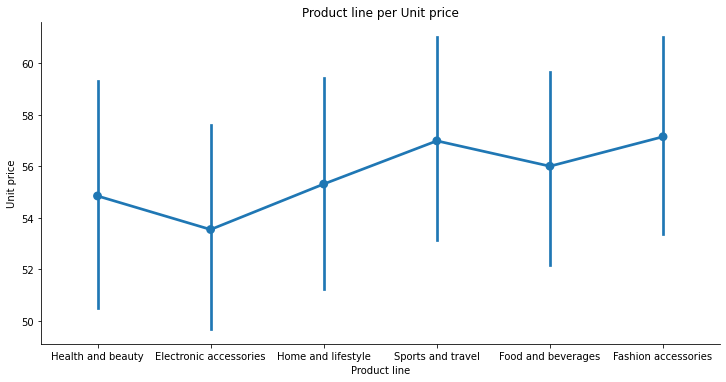

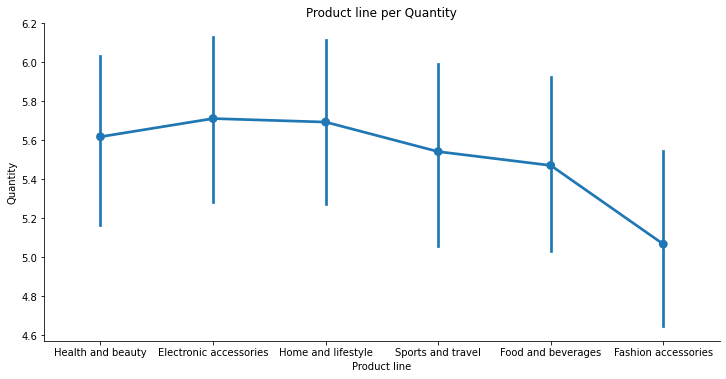

In [80]:
sns.catplot(x='Product line',y='Unit price',kind='point',data=sales,aspect=2)
plt.title('Product line per Unit price')
sns.catplot(x='Product line',y='Quantity',kind='point',data=sales,aspect=2)
plt.title('Product line per Quantity')

Electronic accessoires has the low Unit price, on the other hand it has the high quantity of products purchased by customer => Customers want to buy the cheap products like Electronic accessoires , Health & Beaty and Home & Lifestyle.

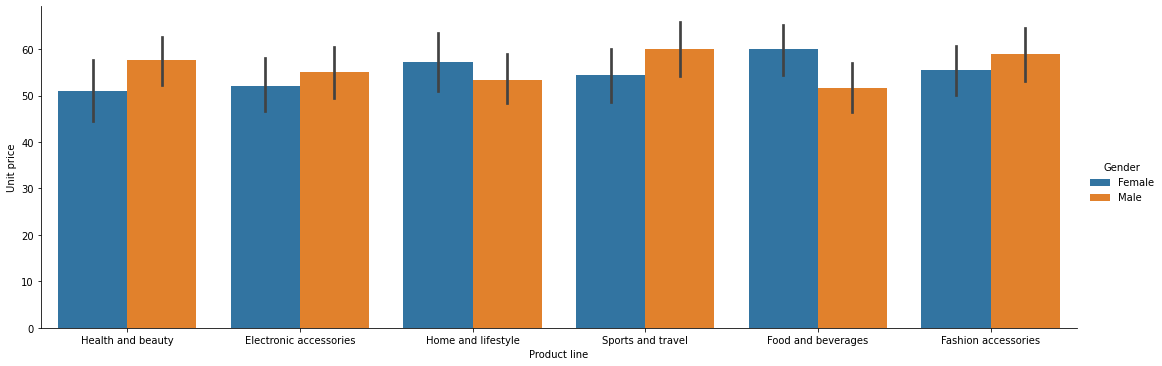

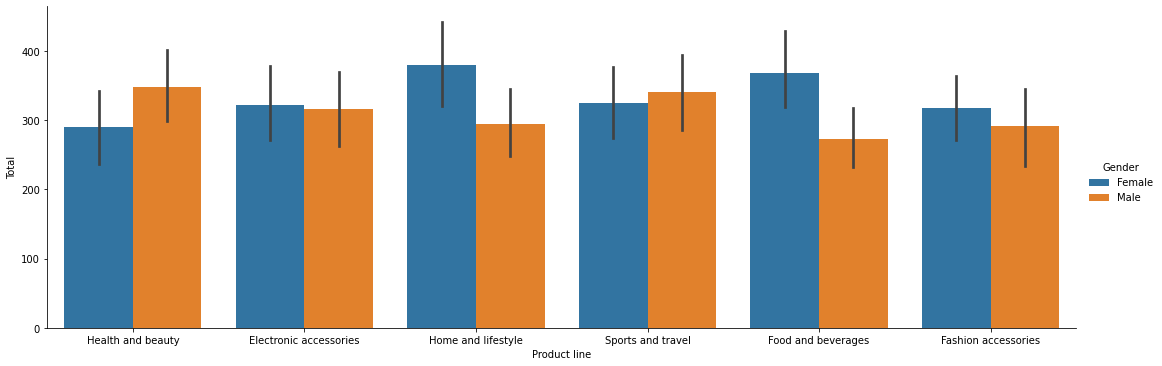

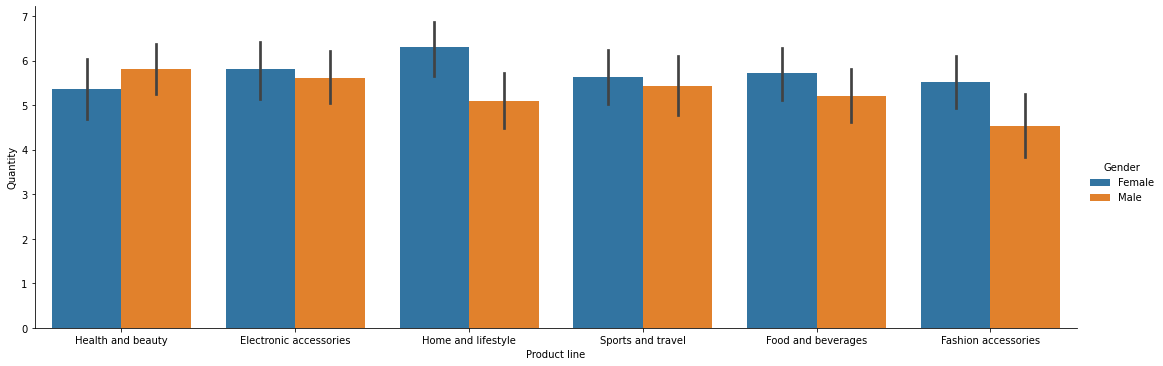

In [81]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=sales, kind = 'bar', aspect = 3 )
sns.catplot(x='Product line',y='Total',hue='Gender',data=sales, kind = 'bar', aspect = 3 )
sns.catplot(x='Product line',y='Quantity',hue='Gender',data=sales, kind = 'bar', aspect = 3 )

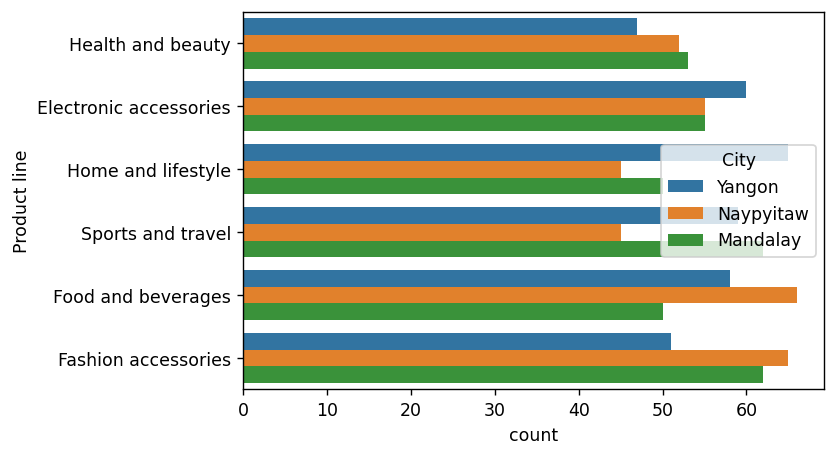

In [82]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales)

Naypyitaw is a good place to sell Fashion accessoires and Food & Beverages.

Yangon is a good place to sell Electronic accesoires.


**FINAL COMPLETE BUSINESS REPORT**

1. The city chosen for expansion should be Naypyitaw.

2. Open the store in Naypyitaw with a full-backed inventory of goods in product categories - Food and Beverages, Fashion Assesories and Electronics.

3. The company should improve service in Electronics domain.

4. Increase service in cash payment modes.